In [3]:
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [4]:
from tqdm import tqdm

In [5]:
temp_nc = netCDF4.Dataset('../eniko/data/tas_day_MPI-ESM-MR_rcp85_r1i1p1_g025.nc')
temp_ncdata_3D = np.array(temp_nc.variables['tas'])
temp_ncdata_2D = temp_ncdata_3D.reshape(temp_ncdata_3D.shape[0], temp_ncdata_3D.shape[1]*temp_ncdata_3D.shape[2])        

dates = pd.to_datetime(netCDF4.num2date(temp_nc.variables['time'][:], temp_nc.variables['time'].units)).year
temp_ncdata_df = pd.DataFrame(temp_ncdata_2D, index = dates)

Text(0.5, 1.0, 'Near-surface air temperature')

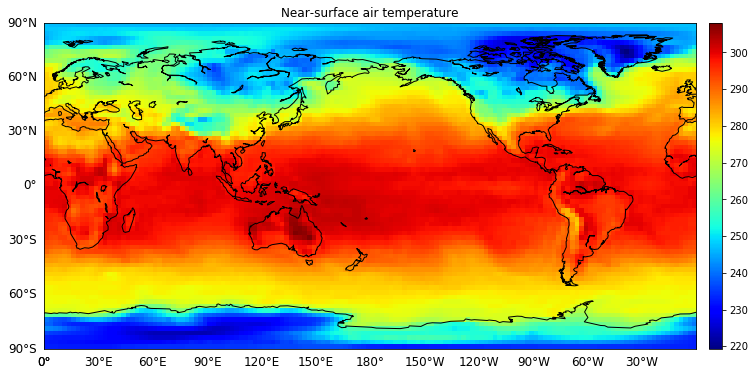

In [6]:
fig = plt.figure(figsize=(16,6))
long = [0, 360]
lat = [-90, 90]

map = Basemap(projection = 'cyl', llcrnrlat = lat[0], llcrnrlon = long[0], urcrnrlat = lat[1], urcrnrlon = long[1])
map.drawcoastlines()
map.drawparallels( np.arange(-90,90.01,30.0), labels = [1,0,0,0], fontsize = 12, linewidth = 0)
map.drawmeridians( np.arange(0.,360.,30.), labels = [0,0,0,1], fontsize = 12, linewidth = 0)

h = map.imshow(temp_ncdata_3D[1500,:], cmap = 'jet', interpolation = 'none', animated = True)
map.colorbar(h, size = "2%")#, pad="40%", ticks = range(cmin, cmax + 1, cint))
plt.title("Near-surface air temperature")